## Introduction to Machine Learning @ NCCU.CS.EDU.TW
#### a simple demonstration for univariate linear regression with scikit learn
##### 參考資料網址：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
##### 參考資料網址：https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
##### Prepared by Chao-Lin Liu

$$
w = \begin{bmatrix}w_{0}\ \ w_{1}\end{bmatrix} 
$$
$$
a = \begin{bmatrix} a_0 \\ a_1\end{bmatrix}, \ a_0=1 $$
$$ x=wa \Rightarrow x=\begin{bmatrix} w_{0}\ \ w_{1}\end{bmatrix}\begin{bmatrix} a_0 \\ a_1\end{bmatrix} = w_{0}a_0+w_{1}a_1$$

In [15]:
# !pip install matplotlib

In [16]:
### 載入一些工具
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [17]:
### 讀入數據檔案
df = pd.read_csv("linear.regression.csv")

##### 以上式子是 DM4 的形式；以下的符號有一些改變
##### 以下的 Y 是上面的 x
##### 以下的 X 是上面的 a

In [18]:
### 選取檔案所需數據
#lr_X = df['X'].values
#lr_XX = np.asarray([[i] for i in lr_X])
#lr_yy = df['Y'].values
#lr_XX = df.iloc[:,0:1].values
#lr_yy = df.iloc[:,1:2].valuesfeatures = ['X']
features = ['X']
targets = ['Y3']
lr_XX = df[features].to_numpy()
lr_yy = df[targets].to_numpy()

In [19]:
### 設定訓練資料與測試資料
### 這樣的切割方式是很不好的示範：將來會再說明
lr_XX_train = lr_XX[:-50]
lr_XX_test  = lr_XX[-50:]
lr_yy_train = lr_yy[:-50]
lr_yy_test  = lr_yy[-50:]

In [20]:
### 進行機器學習
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(lr_XX_train, lr_yy_train)

# Make predictions using the testing set
lr_yy_pred = regr.predict(lr_XX_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# intercept
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[0.20015729]]
Intercept: 
 [4.00404164]


Mean squared error: 0.25
Variance score: 0.99


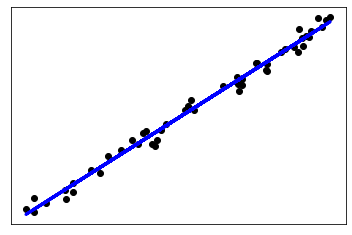

In [21]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(lr_yy_test, lr_yy_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(lr_yy_test, lr_yy_pred))

# Plot outputs
plt.scatter(lr_XX_test, lr_yy_test,  color='black')
plt.plot(lr_XX_test, lr_yy_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()